In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import itertools
import pickle, gzip
import gc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings

In [55]:
train_series = pd.read_csv('training_sample_set.csv')
metadata_train = pd.read_csv('training_set_metadata.csv')
metadata_train.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [82]:
baseline_Xtrain=metadata_train[['ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz', 'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv']].copy()
baseline_Ytrain= metadata_train[['target']].copy()

X_train, X_valid, y_train, y_valid= train_test_split(baseline_Xtrain,baseline_Ytrain, test_size=0.1)

y_train1=np.array(y_train).reshape(-1)
y_valid1=np.array(y_valid).reshape(-1)

X_train.fillna(0, inplace=True)
X_valid.fillna(0, inplace=True)

classes = np.sort(np.array(metadata_train.target.unique()))


C:\Users\Taylor\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [91]:
warnings.filterwarnings('ignore')
accuracies=[]
epochs=100
for e in range(epochs):
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,max_features='log2', random_state=0)
    clf.fit(X_train, y_train1)
    accuracies.append(clf.score(X_valid,y_valid1))
    X_train, X_valid, y_train, y_valid= train_test_split(baseline_Xtrain,baseline_Ytrain, test_size=0.1)
    
    y_train1=np.array(y_train).reshape(-1)
    y_valid1=np.array(y_valid).reshape(-1)

    X_train.fillna(0, inplace=True)
    X_valid.fillna(0, inplace=True)
    
print("Mean Accuracy:" , np.mean(np.array(accuracies)))
print("Min Accuracy: ", np.min(np.array(accuracies)))
print("Max Accuracy: ", np.max(np.array(accuracies)))

Mean Accuracy: 0.4722547770700637
Min Accuracy:  0.4305732484076433
Max Accuracy:  0.532484076433121


Text(60,0.5,'True Label')

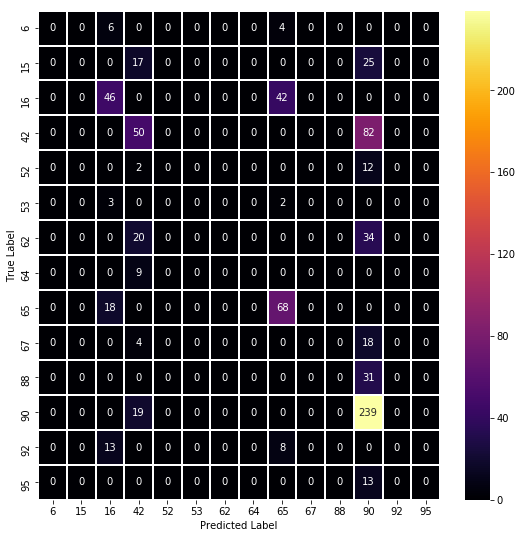

In [94]:
cm=confusion_matrix(y_valid1, clf.predict(X_valid))
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, xticklabels=classes, yticklabels=classes, cmap='inferno', annot=True, lw=1, fmt="d")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

In [124]:
classes = np.sort(np.array(metadata_train.target.unique()))
print(classes)

far_away_count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
nearby_count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]

ddf_count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
wfd_count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for index, row in metadata_train.iterrows():
    itemindex = np.where(classes==row.target)
    if(row.hostgal_specz==0):
        far_away_count[itemindex[0][0]]+=1
    else:
        nearby_count[itemindex[0][0]]+=1
    
    if(row.ddf==0):
        ddf_count[itemindex[0][0]]+=1
    else:
        wfd_count[itemindex[0][0]]+=1
    
print(far_away_count)
print(nearby_count)

print(ddf_count)
print(wfd_count)

[ 6 15 16 42 52 53 62 64 65 67 88 90 92 95]
[151, 0, 924, 0, 0, 30, 0, 0, 981, 0, 0, 0, 239, 0]
[0, 495, 0, 1193, 183, 0, 484, 102, 0, 208, 370, 2313, 0, 175]
[144, 487, 762, 889, 113, 26, 355, 100, 672, 142, 251, 1476, 181, 134]
[7, 8, 162, 304, 70, 4, 129, 2, 309, 66, 119, 837, 58, 41]


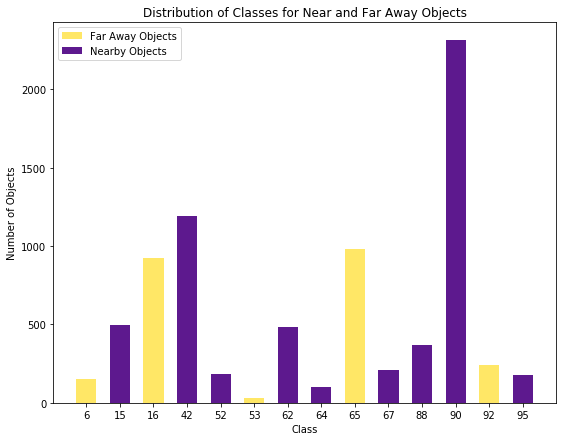

In [137]:
fig, ax = plt.subplots(figsize=(9,7))

index = np.arange(n_classes)
bar_width=.6
rects1 = plt.bar(index, far_away_count, bar_width,
                 alpha=.6,
                 color='gold',
                 label='Far Away Objects')
rects1 = plt.bar(index, nearby_count, bar_width,
                 alpha=.9,
                 color='indigo',
                 label='Nearby Objects')
plt.xticks(y_pos, classes)
plt.xlabel('Class')
plt.ylabel('Number of Objects')
plt.title('Distribution of Classes for Near and Far Away Objects')
plt.legend()
plt.show()

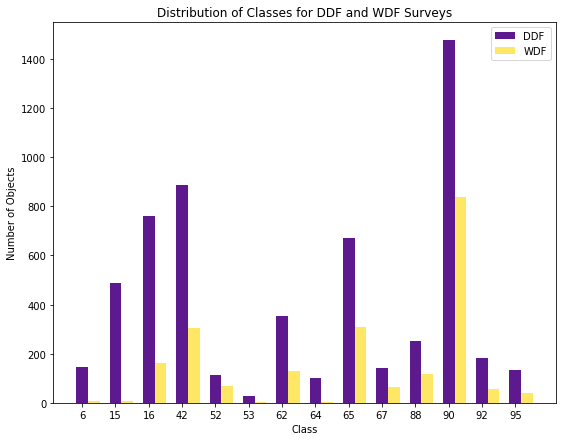

In [138]:
fig, ax = plt.subplots(figsize=(9,7))
index = np.arange(n_classes)
bar_width=.35
rects1 = plt.bar(index, ddf_count, bar_width,
                 alpha=.9,
                 color='indigo',
                 label='DDF')
rects1 = plt.bar(index+bar_width, wfd_count, bar_width,
                 alpha=.6,
                 color='gold',
                 label='WDF')
plt.xticks(y_pos, classes)
plt.xlabel('Class')
plt.ylabel('Number of Objects')
plt.title('Distribution of Classes for DDF and WDF Surveys')
plt.legend()
plt.show()